## Exploring World Cup Data in Python
## By: Vatsal Vinay Parikh

This dataset ([source](https://github.com/martj42/international_results)) includes **44,066** results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

## Import and prepare the dataset

- Import the `pandas` package with the usual alias.

In [1]:
# Import the pandas package with the usual alias
import pandas as pd

- Read `"results.csv"`. Assign to `results`.
- Convert the `date` column to a datetime.
- Get the year component of the `date` column; store in a new column named `year`.

In [2]:
# Read results.csv. Assign to results.
results = pd.read_csv('results.csv')

# Convert the date column to a datetime
results['date'] = pd.to_datetime(results['date'])

# Get the year component of date column; store in a new column named year 
results['year'] = results['date'].dt.year

# See the result
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
...,...,...,...,...,...,...,...,...,...,...
44061,2022-10-22,Saudi Arabia,North Macedonia,1,0,Friendly,Abu Dhabi,United Arab Emirates,True,2022
44062,2022-10-23,Qatar,Guatemala,2,0,Friendly,Málaga,Spain,True,2022
44063,2022-10-26,Saudi Arabia,Albania,1,1,Friendly,Abu Dhabi,United Arab Emirates,True,2022
44064,2022-10-27,Qatar,Honduras,1,0,Friendly,Marbella,Spain,True,2022


## Get the FIFA World Cup data

- Using `results`, count the number of rows of each tournament value.
- Convert the results to a DataFrame for nicer printing.

In [3]:
# Count the number of rows for each tournament; convert to DataFrame
results \
	.value_counts("tournament") \
	.to_frame("num_matches")

,num_matches
tournament,
Friendly,17427
FIFA World Cup qualification,7774
UEFA Euro qualification,2593
African Cup of Nations qualification,1932
FIFA World Cup,900
...,...
AFF Championship qualification,2
TIFOCO Tournament,1
FIFA 75th Anniversary Cup,1


- Query for the rows where tournament is equal to "FIFA World Cup"

In [4]:
# Query for the rows where tournament is equal to "FIFA World Cup"
world_cup_res = results \
	.query('tournament == "FIFA World Cup"')

# See the results
world_cup_res

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930
...,...,...,...,...,...,...,...,...,...,...
40293,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,2018
40294,2018-07-10,France,Belgium,1,0,FIFA World Cup,Saint Petersburg,Russia,True,2018
40295,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,2018
40296,2018-07-14,Belgium,England,2,0,FIFA World Cup,Saint Petersburg,Russia,True,2018


## How many matches in every world cup?

- Using `world_cup_res`, count the number of rows of each year value.
- Convert the results to a DataFrame for nicer printing.

In [5]:
# Count the number of rows for each year; convert to DataFrame
matches_per_year = world_cup_res \
	.value_counts("year") \
	.to_frame("num_matches")

# See the results
matches_per_year

,num_matches
year,
2018,64
2014,64
2010,64
2006,64
2002,64
1998,64
1982,52
1994,52
1990,52


- Import the `plotly.express` package using the alias `px`.

In [6]:
# Import the plotly express package using the alias px
import plotly.express as px

- Using `matches_per_year`, draw a bar plot of `num_matches`. 

The `year` is in the index and will automatically be used for the x-axis.

In [7]:
# Using matches_per_year, draw a bar plot of num_matches
px.bar(matches_per_year, y='num_matches')

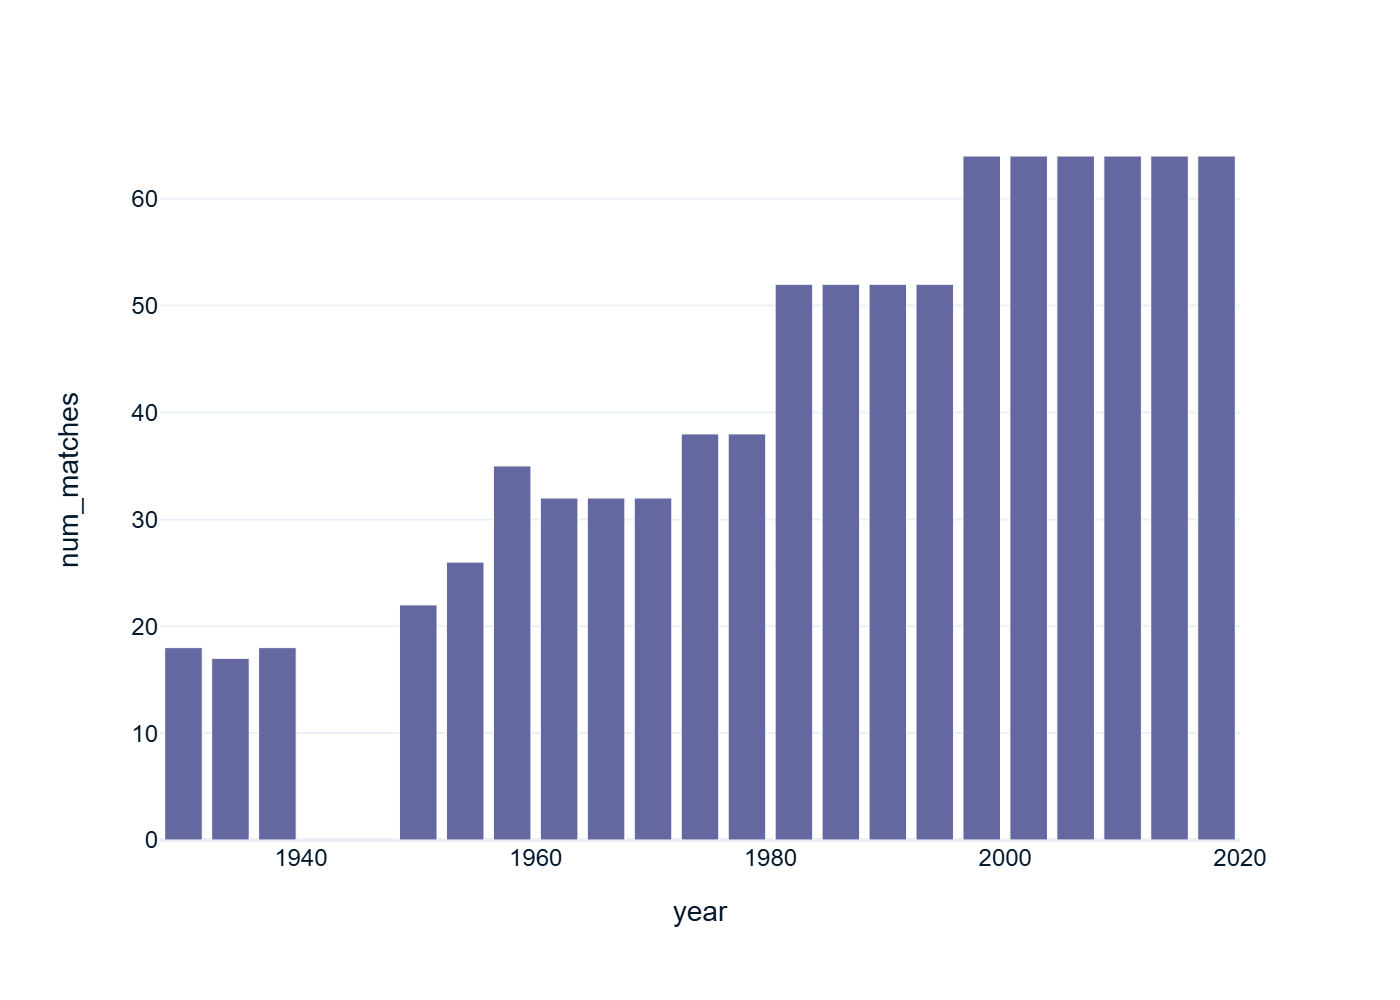

## Which games had the highest goal difference?

- Add a `goal_difference` column as the absolute value of the home score minus the away score.
- Query for rows where the goal difference equals the maximum goal difference.

In [8]:
# Add a goal_difference column as the absolute value of the home score minus the away score
# Query for rows where the goal difference equals the maximum goal difference
world_cup_res \
    .assign(goal_difference = lambda x: (x["home_score"] - x["away_score"]).abs()) \
	.query('goal_difference == goal_difference.max()')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,goal_difference
3667,1954-06-17,Hungary,South Korea,9,0,FIFA World Cup,Zürich,Switzerland,True,1954,9
9208,1974-06-18,Yugoslavia,DR Congo,9,0,FIFA World Cup,Gelsenkirchen,Germany,True,1974,9
12555,1982-06-15,Hungary,El Salvador,10,1,FIFA World Cup,Elche,Spain,True,1982,9


## Which game had the highest total number of goals?

- Add a `total_goals` column as the home score plus the away score.
- Query for rows where the total goals equals the maximum total goals.

In [9]:
# Add a total_goals column as the  home score plus the away score
# Query for rows where the total goals equals the maximum total goals
world_cup_res \
	.assign(total_goals = lambda x: x["home_score"] + x["away_score"]) \
	.query('total_goals == total_goals.max()')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,total_goals
3680,1954-06-26,Switzerland,Austria,5,7,FIFA World Cup,Lausanne,Switzerland,False,1954,12


## Which country scored the most goals?

### Step 1: Calculate the home goals by country

- Using `world_cup_res`, get the `home_team` and `home_score` columns.
- Rename as `team` and `score`.

In [10]:
# Get the home_team and home_score columns
# Rename as team and score
home_goals = world_cup_res \
    .filter(["home_team", "home_score"]) \
	.rename(columns = {"home_team": "team", "home_score": "score"}) 

# See the result
home_goals

,team,score
1311,Belgium,0
1312,France,4
1313,Brazil,1
1314,Peru,1
1315,Argentina,1
...,...,...
40293,Russia,2
40294,France,1
40295,Croatia,2
40296,Belgium,2


### Step 2: Calculate the away goals by country

- Using `world_cup_res`, get the `away_team` and `away_score` columns.
- Rename as `team` and `score`.

In [11]:
# Get the away_team and away_score columns
# Rename as team and score
away_goals = world_cup_res \
    .filter(["away_team", "away_score"]) \
	.rename(columns = {"away_team": "team", "away_score": "score"}) 

# See the result
away_goals

,team,score
1311,United States,3
1312,Mexico,1
1313,Yugoslavia,2
1314,Romania,3
1315,France,0
...,...,...
40293,Croatia,2
40294,Belgium,0
40295,England,1
40296,England,0


### Step 3: Combine the home and away totals

- Concatenate `home_goals` and `away_goals`.
- Group by `team`, `as_index` set to `False`.
- Calculate the total score.
- Rename the `score` column to `total_goals`.
- Sort the total goals so the country with the highest total shows on top.

In [12]:
# Concatenate home_goals and away_goals
# Group by team, as_index equal to False
# Get the total score
# Rename score to total_goals
# Sort by total_goals
total_goals_by_country = pd.concat([home_goals, away_goals]) \
	.groupby("team", as_index=False) \
    .sum("score") \
	.rename(columns = {"score": "total_goals"}) \
	.sort_values("total_goals", ascending=False)

# See the result
total_goals_by_country

,team,total_goals
8,Brazil,229
28,Germany,226
2,Argentina,137
39,Italy,128
26,France,120
...,...,...
11,Canada,0
72,Trinidad and Tobago,0
13,China PR,0
35,Indonesia,0


### Step 4: draw a map colored by number of goals

- Draw a plotly choropleth map, colored by `total_goals`, showing the team on hover.

In [13]:
# Draw a plotly choropleth map
fig = px.choropleth(total_goals_by_country, 
                    locations="team",
                    locationmode="country names",
                    color="total_goals",
                    hover_name="team")
fig.show()

![DataLab plot.png](<attachment:DataLab plot.png>)
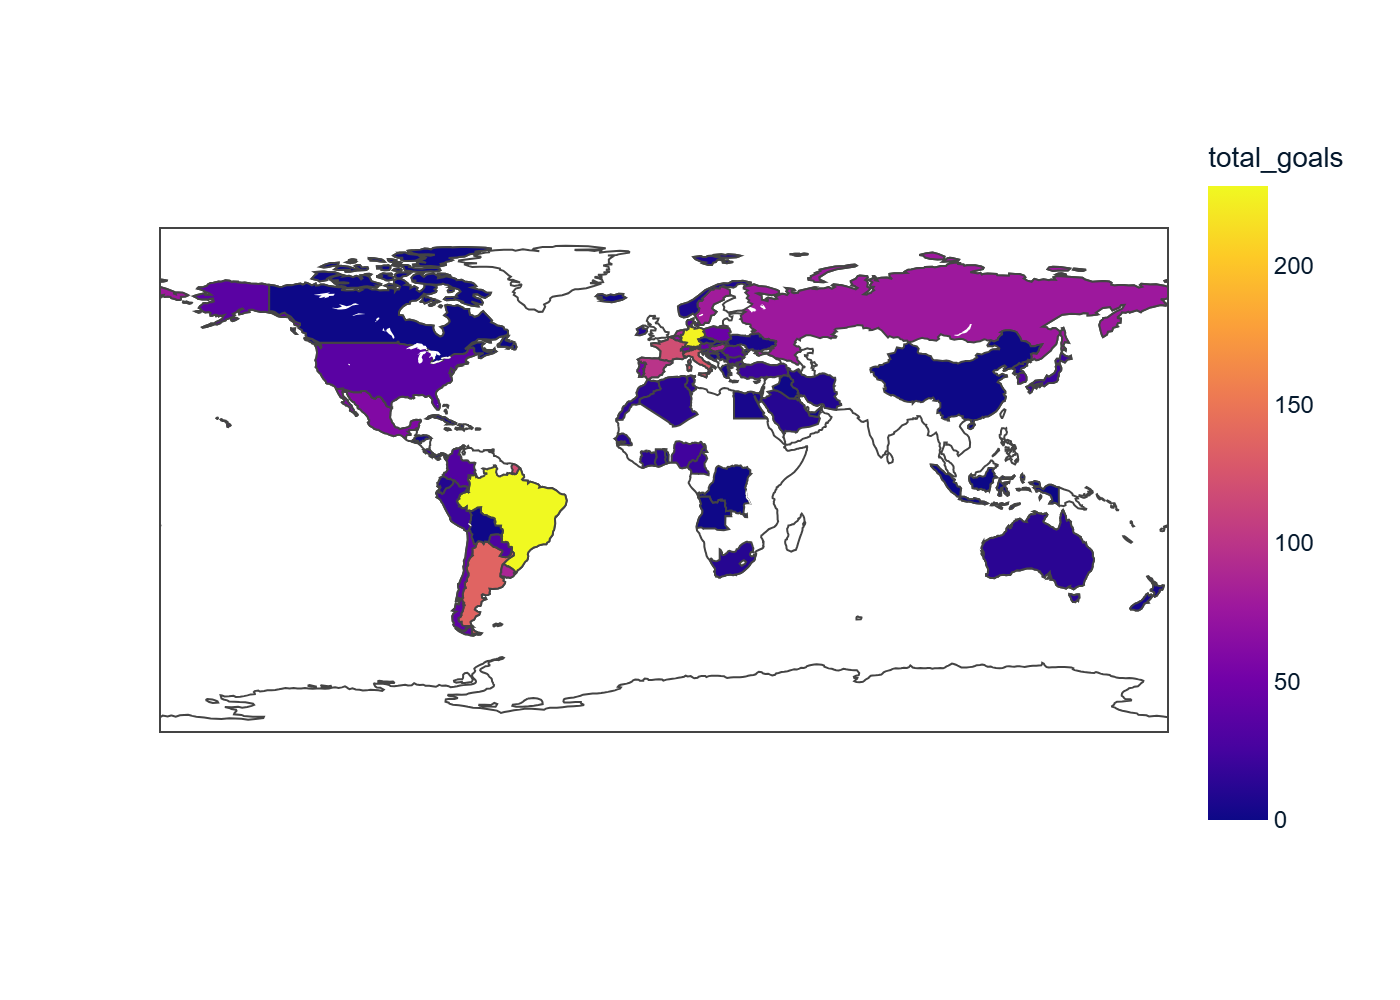

## Does playing close to home matter?

### Import the data
- Import the `winners.csv` file and add the winner for 2018 based on info you find online

In [14]:
# Import the data
# source = wikipedia :)
winner_2018 = pd.DataFrame({"year": [2018], "hosting_country": ["Russia"], "winning_country": ["France"]})
# source = https://www.kaggle.com/datasets/abecklas/fifa-world-cup
winners = pd.read_csv("winners.csv")[["Year", "Country", "Winner"]] \
			.replace('Germany FR', 'Germany', regex=False) \
			.rename(columns = {'Year': "year", 'Country': 'hosting_country', "Winner": "winning_country"}) \
			.append(winner_2018)

winners

,year,hosting_country,winning_country
0,1930,Uruguay,Uruguay
1,1934,Italy,Italy
2,1938,France,Italy
3,1950,Brazil,Uruguay
4,1954,Switzerland,Germany
5,1958,Sweden,Brazil
6,1962,Chile,Brazil
7,1966,England,England
8,1970,Mexico,Brazil
9,1974,Germany,Germany


### Who had the most wins?
- Do a grouped count by `winning_country`.

In [15]:
# Do a grouped count
winners.groupby('winning_country').size().sort_values()

winning_country
England      1
Spain        1
Argentina    2
France       2
Uruguay      2
Germany      4
Italy        4
Brazil       5
dtype: int64

### Add continent information
- Query the World Nations integration to get a list of countries with their respective contintent

In [16]:
-- Get a list of countries with their respective continent
SELECT countries.name AS country,
        continents.name AS continent
FROM countries
  INNER JOIN regions USING(region_id)
  INNER JOIN continents USING(continent_id)
ORDER BY country

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American Samoa,Oceania
4,Andorra,Europe
...,...,...
234,Western Sahara,Africa
235,Yemen,Asia
236,Yugoslavia,Europe
237,Zambia,Africa


- Using the list from the database, add two additional columns, `winning_country` and `hosting_continent`, to the data frame

In [17]:
# Do two merges to create the winning_continent and hosting_continent columns
extra_maps = pd.DataFrame({"country": ["England", "USA", "Korea/Japan", "Russia"], "continent": ["Europe", "North America", "Asia", "Europe"]})
country_continents_2 = country_continents.append(extra_maps)
winners_continents = winners \
	.merge(country_continents_2, how='left', left_on = 'winning_country', right_on = 'country') \
	.rename(columns = {'continent': 'winning_continent'}) \
	.drop(columns = 'country') \
	.merge(country_continents_2, how = 'left', left_on = 'hosting_country', right_on = 'country') \
	.rename(columns = {'continent': 'hosting_continent'}) \
	.drop(columns = 'country')

winners_continents

,year,hosting_country,winning_country,winning_continent,hosting_continent
0,1930,Uruguay,Uruguay,South America,South America
1,1934,Italy,Italy,Europe,Europe
2,1938,France,Italy,Europe,Europe
3,1950,Brazil,Uruguay,South America,South America
4,1954,Switzerland,Germany,Europe,Europe
5,1958,Sweden,Brazil,South America,Europe
6,1962,Chile,Brazil,South America,South America
7,1966,England,England,Europe,Europe
8,1970,Mexico,Brazil,South America,North America
9,1974,Germany,Germany,Europe,Europe


### Analyze South American wins

In [18]:
# How many SA wins in non-SA hosting places?
total_tournaments = winners_continents.shape[0]
total_sa_tournaments = winners_continents.query("hosting_continent == 'South America'").shape[0]
total_sa_wins = winners_continents.query("winning_continent == 'South America'").shape[0]
total_sa_wins_in_sa = winners_continents.query("winning_continent == 'South America' & hosting_continent == 'South America'").shape[0]

print(f"South American teams won {total_sa_wins} world cups in total")
print(f"{total_sa_wins_in_sa} of these were won in South America")
print(f"{total_sa_wins - total_sa_wins_in_sa} of these were won elsewhere")
print(f"{total_sa_wins_in_sa}/{total_sa_tournaments} of South America hosted world cups were won by South American teams.")

South American teams won 9 world cups in total
4 of these were won in South America
5 of these were won elsewhere
4/5 of South America hosted world cups were won by South American teams.


### Analyze European wins

In [19]:
# How many SA wins in non-SA hosting places?
total_tournaments = winners_continents.shape[0]
total_eu_tournaments = winners_continents.query("hosting_continent == 'Europe'").shape[0]
total_eu_wins = winners_continents.query("winning_continent == 'Europe'").shape[0]
total_eu_wins_in_eu = winners_continents.query("winning_continent == 'Europe' & hosting_continent == 'Europe'").shape[0]

print(f"European teams won {total_eu_wins} world cups in total")
print(f"{total_eu_wins_in_eu} of these were won in Europe")
print(f"{total_eu_wins - total_eu_wins_in_eu} of these were won elsewhere")
print(f"{total_eu_wins_in_eu}/{total_eu_tournaments} of Europe hosted world cups were won by European teams.")


European teams won 12 world cups in total
10 of these were won in Europe
2 of these were won elsewhere
10/11 of Europe hosted world cups were won by European teams.


Overall, it's hard to make statements about this because of the small sample size and the hosting continent class imbalance...